In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
def get_liter(name: str) -> str:
    liter = name.split('-')[0].split()[0]
    return '\U00000462' if liter == "ять" else liter.lower()

In [4]:
def convert_image(image) -> np.array:
    b = image.getbbox()
    img = image.crop(b)
    img = img.resize((10, 10), resample=Image.BICUBIC)
    #img = image.convert('LA')
    img = [(c[0], c[0], c[0], c[1]) for c in img.getdata()] if image.mode != 'RGBA' else img
    #img = [(c[0], c[1]) for c in image.getdata()]
    #L = R * 299/1000 + G * 587/1000 + B * 114/1000
    #img = [(c[0] * 1000 / (3*299), c[0]*1000 / (3*587), c[0]*1000 / (3*114), c[1]) for c in image.getdata()] if image.mode != 'RGBA' else image
    return np.array(img, dtype=float).flatten() / 255

In [8]:
def load_images(path: str) -> (np.array, np.array):
    images = []
    labels = []
    for pict in os.listdir(path):
        with Image.open(os.path.join(path, pict)) as image:
            img = convert_image(image)
            images.append(img)
            labels.append(get_liter(pict))
    return np.array(images), np.array(labels)

In [1]:
def print_metrics(trues, preds):
    f1 = metrics.f1_score(trues, preds, average='macro')
    precision = metrics.precision_score(trues, preds, average='macro')
    recall = metrics.recall_score(trues, preds, average='macro')
    print(f"precision: {precision}\nrecall: {recall}\nF1: {f1}")

In [6]:
def make_conf_matrix(trues, preds, labels):
    confusion_matrix = metrics.confusion_matrix(trues, preds)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=sorted(labels))
    cm_display.plot()
    plt.show()

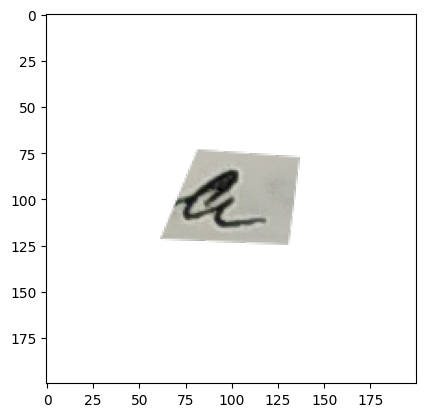

In [31]:
 with Image.open(r'C:\Users\gudko\history_envs\sklearn_env\data_knn\а-2011.png') as image:
     plt.imshow(image)

In [9]:
X, labels = load_images(r'C:\Users\gudko\history_envs\sklearn_env\data_knn')
le = LabelEncoder()
y = le.fit_transform(labels) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=313, test_size=0.15)

In [10]:
X_train.shape

(2623, 400)

In [10]:
X_test.shape

(464, 400)

In [11]:
labels = le.inverse_transform(y_test)

In [38]:
knn_params = {'n_neighbors': range(5, 51),
              'p': [1, 1.5, 2, 3]}

knn = KNeighborsClassifier(n_jobs=-1)
knn = GridSearchCV(knn, knn_params)
knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': range(5, 51), 'p': [1, 1.5, 2, 3]})

C:\Users\gudko\history_envs\sklearn_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


precision: 0.2231321689341244
recall: 0.20675810741253797
F1: 0.18924500954140747


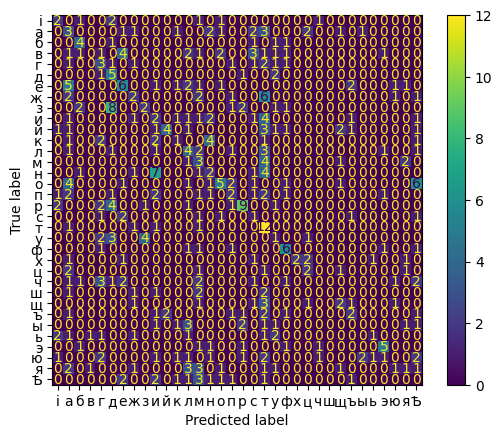

In [40]:
predicts = le.inverse_transform(knn.predict(X_test))
f1 = metrics.f1_score(labels, predicts, average='macro')
precision = metrics.precision_score(labels, predicts, average='macro')
recall = metrics.recall_score(labels, predicts, average='macro')

print(f"precision: {precision}\nrecall: {recall}\nF1: {f1}")
make_conf_matrix(labels, predicts, le.classes_)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(random_state=313)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=313)

In [16]:
predicts = le.inverse_transform(tree.predict(X_test))
f1 = metrics.f1_score(labels, predicts, average='macro')
precision = metrics.precision_score(labels, predicts, average='macro')
recall = metrics.recall_score(labels, predicts, average='macro')

print(f"precision: {precision}\nrecall: {recall}\nF1: {f1}")

precision: 0.21263643907810903
recall: 0.2116279883425529
F1: 0.20120342104952887


In [12]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

C:\Users\gudko\history_envs\sklearn_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


precision: 0.4543420660646652
recall: 0.43946928869648266
F1: 0.4160503886552905


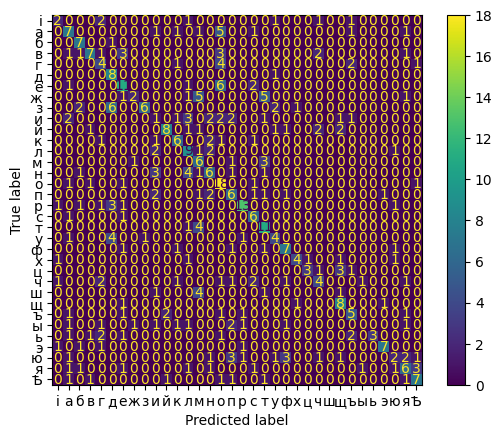

In [13]:
bagging = BaggingClassifier(n_estimators=250, max_samples=0.75, n_jobs=-1)
bagging.fit(X_train, y_train)
predicts = le.inverse_transform(bagging.predict(X_test))
f1 = metrics.f1_score(labels, predicts, average='macro')
precision = metrics.precision_score(labels, predicts, average='macro')
recall = metrics.recall_score(labels, predicts, average='macro')

print(f"precision: {precision}\nrecall: {recall}\nF1: {f1}")
make_conf_matrix(labels, predicts, le.classes_)

In [53]:
forest = RandomForestClassifier(n_estimators=200, max_samples=0.75, n_jobs=-1)
forest.fit(X_train, y_train)
predicts = le.inverse_transform(forest.predict(X_test))
f1 = metrics.f1_score(labels, predicts, average='macro')
precision = metrics.precision_score(labels, predicts, average='macro')
recall = metrics.recall_score(labels, predicts, average='macro')

print(f"precision: {precision}\nrecall: {recall}\nF1: {f1}")

precision: 0.44116981003573585
recall: 0.4456844431503557
F1: 0.4125954169362359


C:\Users\gudko\history_envs\sklearn_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC

In [15]:
logreg = LogisticRegressionCV(max_iter=100, n_jobs=-1, random_state=313)
logreg.fit(X_train, y_train)
predicts = le.inverse_transform(logreg.predict(X_test))
print_metrics(labels, predicts)

precision: 0.3842485155529227
recall: 0.36726736509122504
F1: 0.3583501557668573


C:\Users\gudko\history_envs\sklearn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
svm = SVC(random_state=313)
svm.fit(X_train, y_train)
predicts = le.inverse_transform(svm.predict(X_test))
print_metrics(labels, predicts)

precision: 0.23954681340541822
recall: 0.21565616475300706
F1: 0.19051329803375708


C:\Users\gudko\history_envs\sklearn_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
svm_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_svm = GridSearchCV(SVC(), svm_params)
grid_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [21]:
grid_svm.best_params_

{'kernel': 'linear'}

In [24]:
predicts = le.inverse_transform(grid_svm.predict(X_test))
print_metrics(labels, predicts)

precision: 0.38398302472855295
recall: 0.3664584607526813
F1: 0.361993525851342


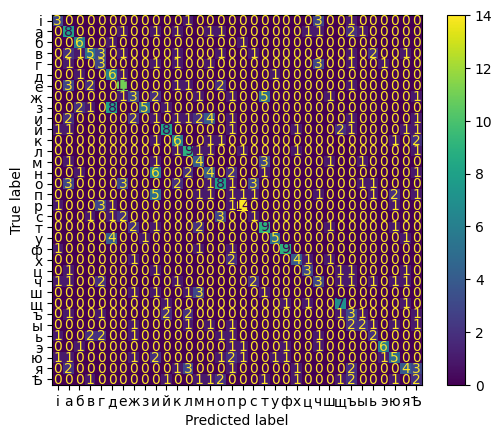

In [25]:
make_conf_matrix(labels, predicts, le.classes_)